In [1]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
train = "/kaggle/input/dogs-vs-cats/train"
test = "/kaggle/input/dogs-vs-cats/test"

train_data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = train_data_augmentation.flow_from_directory(
    directory=train,
    target_size= (256, 256),
    batch_size = 32,
    class_mode = "binary"
)


test_data = test_data_augmentation.flow_from_directory(
    directory=train,
    target_size= (256, 256),
    batch_size = 32,
    class_mode = "binary"
)

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [3]:
#CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu", input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 128, activation = "relu"),
    tf.keras.layers.Dense(units = 64, activation = "relu"),
    tf.keras.layers.Dense(units=32, activation = "relu"),
    tf.keras.layers.Dense(units = 1, activation = "sigmoid") ,
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [4]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [5]:
history = model.fit(train_data, epochs=2, validation_data=test_data)

Epoch 1/2
625/625 [==============================] - 255s 380ms/step - loss: 0.6537 - accuracy: 0.6108 - val_loss: 0.5571 - val_accuracy: 0.7235
Epoch 2/2
625/625 [==============================] - 153s 244ms/step - loss: 0.5413 - accuracy: 0.7301 - val_loss: 0.4434 - val_accuracy: 0.7979


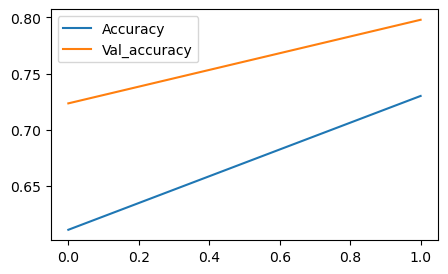

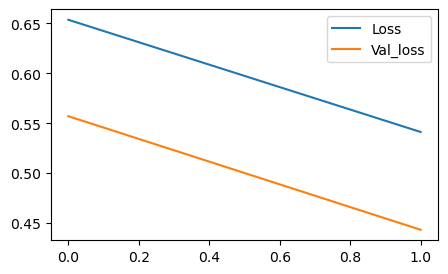

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5, 3])
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Val_accuracy")
plt.legend()

plt.figure(figsize=[5, 3])
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"],label = "Val_loss")
plt.legend()